## Exploratory Data Analysis on Terry Stops
This is a continuation of the project we started by preprocessing. As stated in the first part of this project, the "Preprocess file", the objectives of this project are:

* Determine if there is a relationship between Terry Stops and a subject's race
* Do the differences in races between the officer and the subject play a role in arrests?
* How do Terry Stops in Seattle compare to the circumstances around *Terry v. Ohio*?
* Determine the likelihood of an arrest occurring during a Terry Stop

In this part we will address the first three objectives and the fourth one will be covered in the third part of this project which is the modeling part.

## Loading the cleaned data

In [39]:
# Importing the relevant libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('data/clean_Terry_stops_data.csv')
# df = df.drop('Unnamed:0', axis=1)
df.head()


,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,repeat_offenders,incident_year,incident_month,officer_age,field_contact,offense_report,reported_hour,dif_race,dif_gender,dif_race_gender
0,1_17,unassigned,20150000084533,28020,Referred for Prosecution,Knife/Stabbing Instrument,4585,M,Hispanic,Black or African American,...,No,2015,3,60,n,n,16,True,True,Y
1,36_45,unassigned,20150000001428,28092,Field Contact,NaN,7634,M,White,Multi-Racial,...,No,2015,3,38,y,n,5,True,False,Y
2,18_25,unassigned,20150000001428,28093,Field Contact,NaN,7634,M,White,White,...,No,2015,3,38,y,n,5,False,False,N
3,26_35,unassigned,20150000001437,28381,Field Contact,NaN,7634,M,White,White,...,No,2015,3,38,y,n,10,False,False,N
4,36_45,unassigned,20150000087329,28462,Offense Report,NaN,7634,M,White,White,...,No,2015,3,38,n,y,11,False,False,N


## Relationship between Terry Stops and Subject's Race
Here we will try to see if there is any bias in the Terry Stops based on the Subject's Race.

In [41]:
# Let us first check the stop resolutions
df.stop_resolution.value_counts()

stop_resolution
Field Contact               29173
Offense Report              15555
Arrest                      14592
Referred for Prosecution      717
Citation / Infraction         215
Name: count, dtype: int64

We are trying to see if race has any role to play in the Terry Stops. To do that let us calculate what the stop ratios are for each race in the dataset.

In [42]:
# Checking the races in the dataset
df.subject_perceived_race.value_counts()

subject_perceived_race
White                        29548
Black or African American    18119
Not Specified                 6108
Asian                         2070
Hispanic                      1666
Native American               1638
Multi-Racial                   796
Other                          307
Name: count, dtype: int64

In [46]:
# Values for each race in the dataset
White = 29548
African_American = 18119
Not_Specified = 6108
Asian = 2070
Hispanic = 1666
Native_American = 1638
Multi_Racial = 796
Other = 307

# Calculating the stop ratios for each race
stop_ratio_white = White / len(df['stop_resolution'])
stop_ratio_African_American = African_American / len(df['stop_resolution'])
stop_ratio_Not_Specified = Not_Specified / len(df['stop_resolution'])
stop_ratio_Asian = Asian / len(df['stop_resolution'])
stop_ratio_Hispanic = Hispanic / len(df['stop_resolution'])
stop_ratio_Native_American = Native_American / len(df['stop_resolution'])
stop_ratio_Multi_Racial = Multi_Racial / len(df['stop_resolution'])
stop_ratio_Other = Other / len(df['stop_resolution'])

# Creating a dataframe to display the stop ratios
keys = ['White', 'African American', 'Not Specified', 'Asian', 
        'Hispanic', 'Native American', 'Multi-Racial', 'Other']
vals = [stop_ratio_white, stop_ratio_African_American, stop_ratio_Not_Specified, 
        stop_ratio_Asian, stop_ratio_Hispanic, stop_ratio_Native_American, stop_ratio_Multi_Racial, stop_ratio_Other]

ratio = {}

for key in keys:
    for val in vals:
        ratio[key] = val
        vals.remove(val)
        break


stop_ratio_df = pd.DataFrame(ratio, index=[0])
stop_ratio_df


,White,African American,Not Specified,Asian,Hispanic,Native American,Multi-Racial,Other
0,0.490407,0.30072,0.101374,0.034356,0.027651,0.027186,0.013211,0.005095


Ok so we see here that the highest stop ratio is for White and Black or African American follows second.

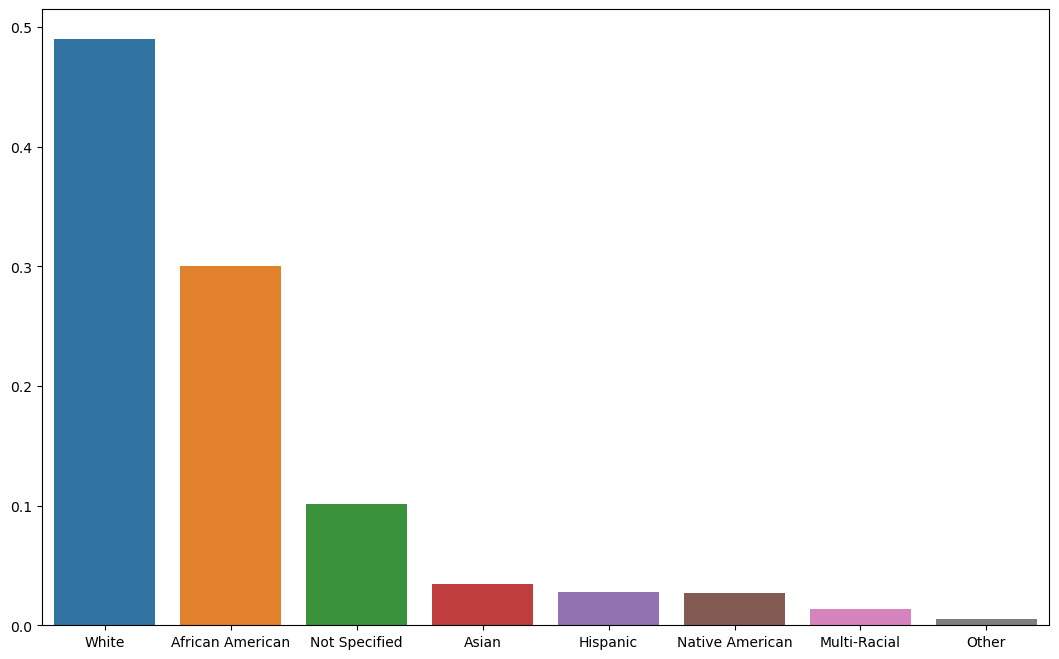

In [47]:
# let us plot this ratios

fig = plt.figure(figsize=(13,8))

sns.barplot(data=stop_ratio_df)
sns.xlabel=('Race')
sns.ylabel=('Percentage of Respective Population'), 
sns.title=('Proportion of People Stopped According' + ' to Respective Population')

In [45]:
# Let create a dataframe called stops with some of the key features that could have direct relationship
stops = df[['stop_resolution', 'weapon_type', 'final_call_type', 'arrest_flag', 'frisk_flag']]
stops



,stop_resolution,weapon_type,final_call_type,arrest_flag,frisk_flag
0,Referred for Prosecution,Knife/Stabbing Instrument,Unknown,N,Y
1,Field Contact,NaN,Unknown,N,N
2,Field Contact,NaN,Unknown,N,N
3,Field Contact,NaN,Unknown,N,N
4,Offense Report,NaN,--CRISIS COMPLAINT - GENERAL,N,Y
...,...,...,...,...,...
60247,Field Contact,Firearm,Unknown,N,Y
60248,Field Contact,Unknown,Unknown,N,Y
60249,Field Contact,Unknown,Unknown,N,Y
60250,Field Contact,Unknown,--ROBBERY - STRONG ARM,N,Y
